In [7]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
%matplotlib inline

In [2]:
X=np.load('X.npy')
Y=np.load('Y.npy')

In [4]:
list_names=np.load('list_names.npy')
list_names = np.delete(list_names, 5) #deleted Illegal Parking - missing one year of info
a=[]
for i in list_names:
    a.append(np.load('cube_'+i+'.npy'))

In [5]:
w=np.zeros(a[0].shape)
for d in range(a[0].shape[0]):
#    print (d),
#    print ('\r'),
    for r in range(a[0].shape[1]):
        for c in range(a[0].shape[2]):
            w[d,r,c]=np.median([a[i][d,r,c] for i in range(len(a))]) 

In [6]:
w_all=w[:,:,:].sum(0)
w_all/=w_all.max()
w_all[w_all<0.01] = 0
w_all.max()

1.0

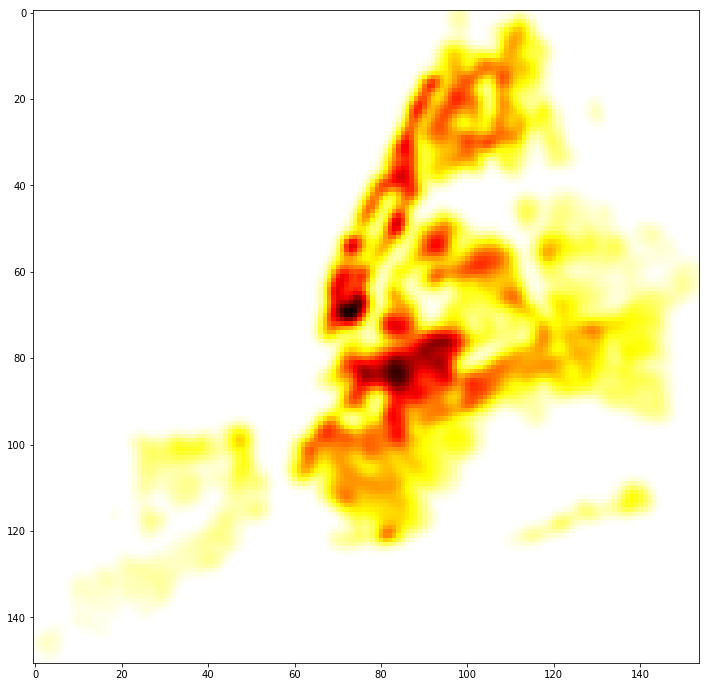

In [20]:
img = ndimage.gaussian_filter(w_all, sigma=(1, 1), order=0)
img[img<10**-3]=0
plt.set_cmap('hot_r')
plt.figure(figsize=(12,12))
plt.imshow(img, interpolation='nearest')
plt.show()

In [12]:
def plot_normalized_complaint_type(complaint_type,i,ax):
    temp=complaint_type[i,:,:]
    temp[temp<.01]=0
    levels =np.arange(0,5,1)
    CS1=ax.contourf(X, Y, temp, levels=levels, cmap=plt.cm.hot_r,extend='both')
    CS1.cmap.set_under('w')
    #cbar = plt.colorbar(CS1)
    #cbar.ax.set_ylabel('Complaints per $(1000 ft)^2$')
    ax.axis('off')
#    ax.set_title(list_names[complaint_type_index]+', Month: '+str(i))
#    ax.set_title('Noise - R'+', MM: '+str(i))

C:\Users\maism\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\maism\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\maism\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


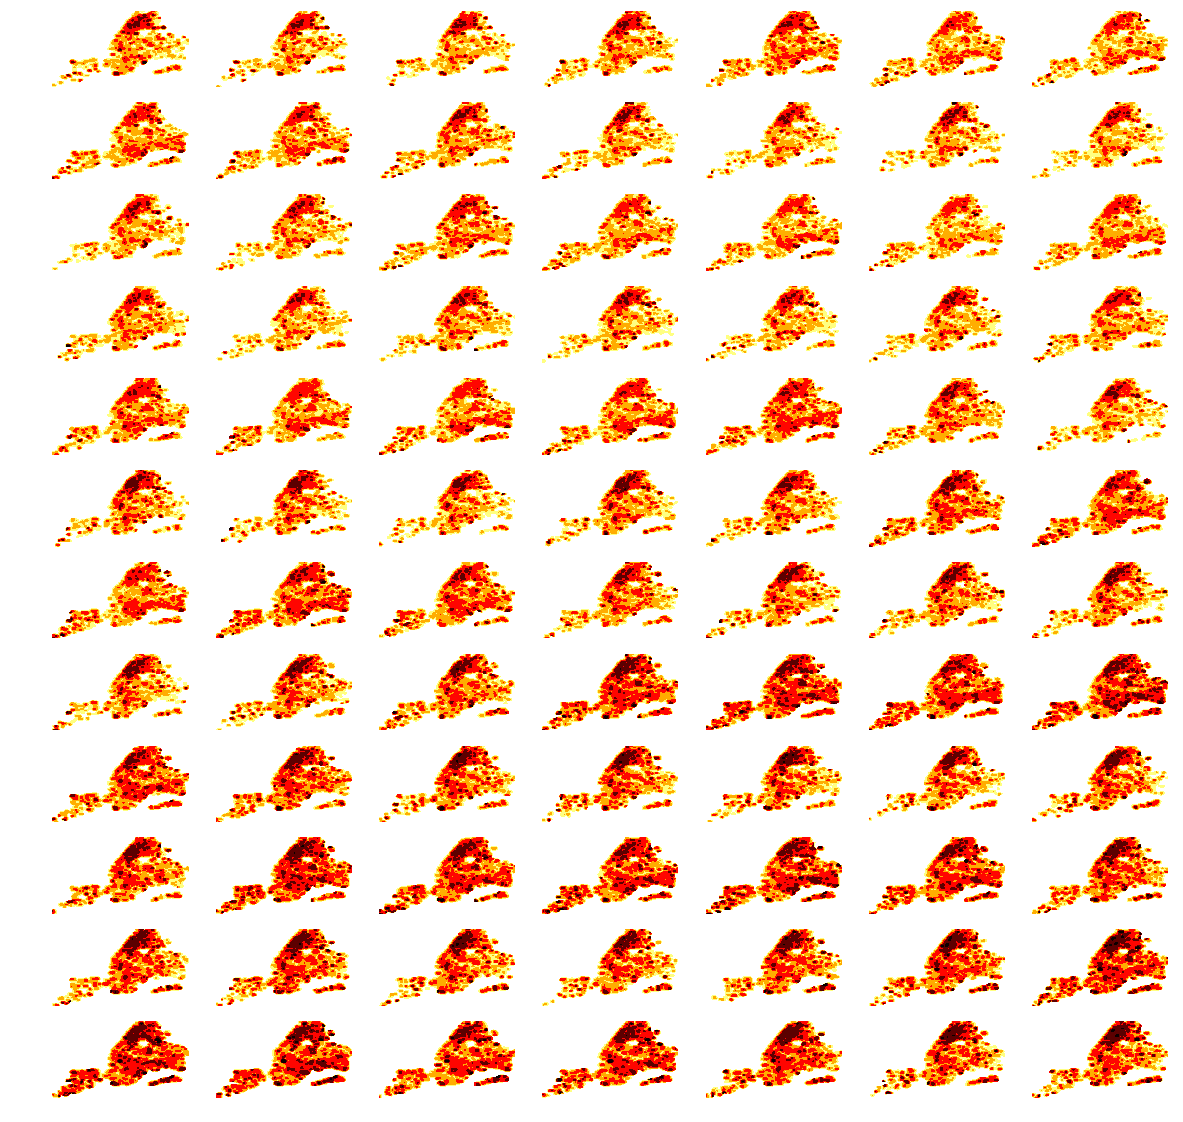

In [13]:
# For Testing Purposes Only - Don't use it to print images
# Noise Residential Normalized
noise_normalized = a[0]/img
noise_normalized = np.log(noise_normalized)
noise_normalized[noise_normalized==np.inf]=0
fig, axs = plt.subplots(12, 7,figsize=(20,20))
for ax, i in zip(axs.ravel(), range(84)):
    plot_normalized_complaint_type(noise_normalized,i,ax)

C:\Users\maism\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


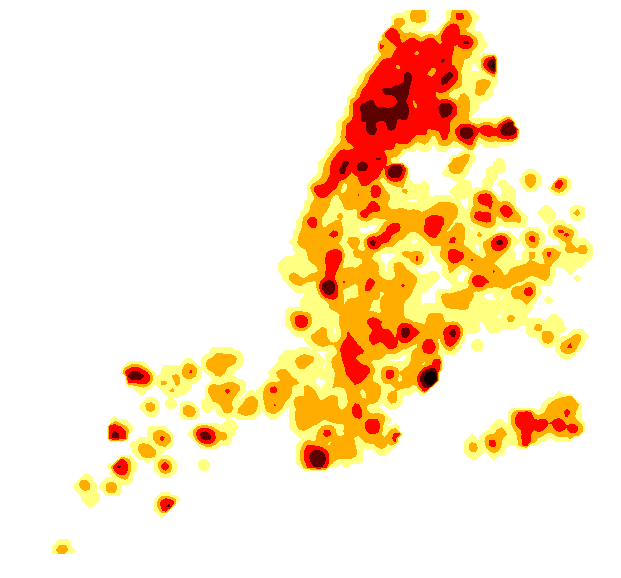

In [17]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
plot_normalized_complaint_type(noise_normalized,1,axs)

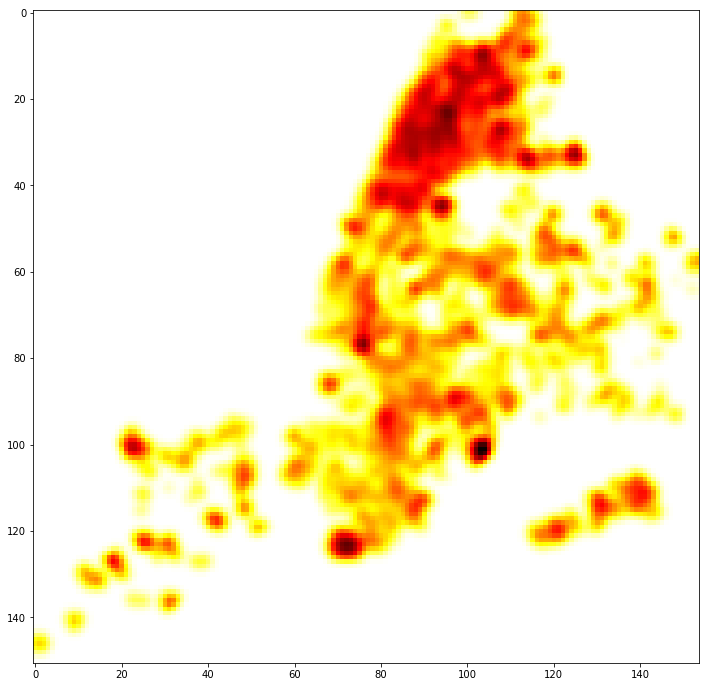

In [32]:
# Use to get the normalized KDE
noise_normalized = np.nan_to_num(noise_normalized)
img = ndimage.gaussian_filter(noise_normalized[0], sigma=(1, 1), order=0)
img[img<10**-3]=0
plt.set_cmap('hot_r')
plt.figure(figsize=(12,12))
plt.imshow(img, interpolation='nearest')
plt.show()

In [25]:
noise_normalized = np.nan_to_num(noise_normalized)